# Find BirdNET Classification for a set of samples 

In [1]:
import os

import numpy as np
import torch
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

from bring_features_and_file_paths import bring_features_and_file_paths
from bring_features_and_file_paths import from_spectrogram_path_to_BirdNET_output_path
from bring_features_and_file_paths import get_spectrogram_time_mark_in_file
from bring_features_and_file_paths import get_BirdNET_detections

## Analyzing the Detections in All Clusters with BirdNET

In [2]:
# For Xeno-Canto
# features_path = '/projects/MultiActiveAI/Samir_VICReg_Outputs/xeno_canto_features'
# indices_path = '/projects/MultiActiveAI/Samir_VICReg_Outputs/xeno_canto_indices/indices.pth'
# label_predictions_path = '/projects/MultiActiveAI/Samir_VICReg_Outputs/xeno_canto_indices/label_predictions.pth'
# detection_rates_path = '/projects/MultiActiveAI/Samir_VICReg_Outputs/xeno_canto_indices/detection_rates.pth'

# For Morton Arboretum
Spectrograms_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/Spectrograms'
BirdNET_BASE_PATH = '/grand/projects/BirdAudio/Soundscapes/BirdNET_Output'
features_path = '/projects/MultiActiveAI/Samir_VICReg_Outputs/features_third_pass'
indices_path = '/projects/MultiActiveAI/Samir_VICReg_Outputs/indices_third_pass/include_indices.pth'
label_predictions_path = '/projects/MultiActiveAI/Samir_VICReg_Outputs/indices_third_pass/label_predictions.pth'
detection_rates_path = '/projects/MultiActiveAI/Samir_VICReg_Outputs/indices_third_pass/detection_rates.pth'

In [3]:
features, file_paths = bring_features_and_file_paths(features_path)
indices = torch.load(indices_path)
label_predictions = torch.load(label_predictions_path)

print(f"features is of shape {features.shape}")
print(f"file_paths is of shape {file_paths.shape}")
print(f"indices is of shape {indices.shape}")
print(f"label predictions is of shape {label_predictions.shape}")

We have 2136286 feature vectors.
features is of shape torch.Size([2136286, 2048])
file_paths is of shape torch.Size([2136286, 81])
indices is of shape (212417,)
label predictions is of shape (212417,)


In [4]:
def analyze_clusters(clusters):   
    clusters_data = {}

    for cluster in tqdm(clusters):
        cluster_indices = indices[label_predictions == cluster]

        sampled_features = features[cluster_indices]
        sampled_file_paths = file_paths[cluster_indices]

        spectrogram_duration = 9.0
        data = []
        
        for k, fpath in enumerate(sampled_file_paths):
            file_path = ''.join([chr(int(x)) for x in fpath]).replace('~','')
            BirdNET_PATH = from_spectrogram_path_to_BirdNET_output_path(fpath)
            print(os.path.join(BirdNET_BASE_PATH, BirdNET_PATH))
            try:
                start_time = get_spectrogram_time_mark_in_file(fpath, spectrogram_duration)

                interval = (start_time, start_time + spectrogram_duration)
                data_elements = get_BirdNET_detections(os.path.join(BirdNET_BASE_PATH, BirdNET_PATH), interval, confidence_threshold = 0.0)
                for data_element in data_elements:
                    data.append(data_element)

            except Exception:
                print(f"Error in processing spectrogram {k}/{len(sampled_file_paths)} in cluster {cluster}.")

        data = pd.DataFrame(data=data)
        
        clusters_data[cluster] = data
    return clusters_data

In [5]:
def compute_detection_rates(clusters_data, save=False):
    detection_rates = []
    
    for data in clusters_data.values():
        total_values = data.detection.value_counts().sum()
        total_detections = total_values - data.detection.value_counts()["No detection"]
        detection_rate = total_detections / total_values

        detection_rates.append(detection_rate)

    if save:  
        torch.save(detection_rates, detection_rates_path)
    
    return detection_rates

In [6]:
clusters_data = analyze_clusters([0])
# clusters_data = analyze_clusters(range(100))
# detection_rates = compute_detection_rates(clusters_data, save=False)

  0%|          | 0/1 [00:00<?, ?it/s]

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T170000-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T170000-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210726_STUDY/20210726

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210727_STUDY/20210727T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210726_STUDY/20210726T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T170000-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T170000-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210727_STUDY/20210727T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T170000-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T170000-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210719_STUDY/20210719T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210723_STUDY/20210723T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210725_STUDY/20210725

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210727_STUDY/20210727T063139-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210726_STUDY/20210726T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T170000-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

100%|██████████| 1/1 [00:18<00:00, 18.86s/it]

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T131727-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210720_STUDY/20210720T063138-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210722_STUDY/20210722T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721T063137-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210724_STUDY/20210724T234548-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00004862/20210721_STUDY/20210721

In [7]:
k = 10

detection_rates = torch.load(detection_rates_path)
detection_rates = np.array(detection_rates)
top_clusters = np.argsort(detection_rates)[::-1][:k]
top_detection_rates = detection_rates[top_clusters]

print(f"Top {k} Clusters")
print("----------------")
for cluster, detection_rate in zip(top_clusters, top_detection_rates):
    print(f"Cluster {cluster:2} | Detection Rate: {detection_rate:.2f}")

Top 10 Clusters
----------------
Cluster 17 | Detection Rate: 1.00
Cluster 50 | Detection Rate: 0.99
Cluster 85 | Detection Rate: 0.98
Cluster  8 | Detection Rate: 0.98
Cluster 38 | Detection Rate: 0.98
Cluster 33 | Detection Rate: 0.98
Cluster 83 | Detection Rate: 0.97
Cluster  3 | Detection Rate: 0.97
Cluster 90 | Detection Rate: 0.96
Cluster 94 | Detection Rate: 0.96


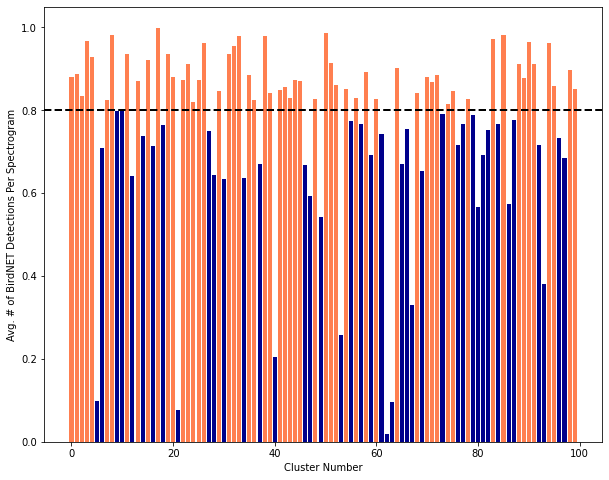

In [8]:
threshold = 0.8

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(range(100), detection_rates, color=["coral" if detection_rates[i] > threshold else "darkblue" for i in range(100)])
ax.axhline(threshold, linewidth=2, color='k', ls='--')
ax.set_xlabel("Cluster Number")
ax.set_ylabel("Avg. # of BirdNET Detections Per Spectrogram")
plt.show()

In [9]:
save_clusters = top_clusters[top_detection_rates > threshold]
save_indices = indices[[label in save_clusters for label in label_predictions]]
print(f"Saving {len(save_indices)} indices.")
# torch.save(save_indices, '/projects/MultiActiveAI/Samir_VICReg_Outputs/indices_third_pass/include_indices.pth')

Saving 8229 indices.


## Analyzing a Particular Cluster with BirdNET

In [10]:
clusters_to_analyze = save_clusters

In [ ]:
clusters_data = analyze_clusters(clusters_to_analyze)

  0%|          | 0/10 [00:00<?, ?it/s]

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210722_STUDY/20210722T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T234549+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T140000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210607_STUDY/20210607T180000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T234549+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210618_STUDY/20210618

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T140000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210601_STUDY/20210601T000000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T140000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T140000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210721_STUDY/20210721T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210610_STUDY/20210610T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210607_STUDY/20210607T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210721_STUDY/20210721T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T160000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T150000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210525_STUDY/20210525T100000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210525_STUDY/20210525T100000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210525_STUDY/20210525T100000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210721_STUDY/20210721T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210722_STUDY/20210722T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T220000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T160000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210525_STUDY/20210525T100000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210618_STUDY/20210618

 10%|█         | 1/10 [00:02<00:26,  3.00s/it]

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210525_STUDY/20210525T100000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T234549+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T140000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210608_STUDY/20210608T140000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T234549+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210715_STUDY/20210715T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023764/20210607_STUDY/20210607

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210715_STUDY/20210715T170007-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210720_STUDY/20210720T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set3/00023734/20210815_STUDY/20210815T063148-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023795/20210703_STUDY/20210703T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210704_schedule/20210704T063148-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023700/20210719_STUDY/20210719T063143-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210718_STUDY/20210718T063146-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023734/20210716_STUDY/20210

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210721_STUDY/20210721T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023795/20210630_STUDY/20210630T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210704_schedule/20210704T131737-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210716_STUDY/20210716T030851-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210704_schedule/20210704T131737-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023757/20210721_STUDY/20210721T095442-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210704_schedule/20210704T063148-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210704_sched

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210704_schedule/20210704T170007-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210704_STUDY/20210704T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023795/20210702_STUDY/20210702T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210719_STUDY/20210719T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210704_STUDY/20210704T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023795/20210702_STUDY/20210702T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210703_schedule/20210703T202300-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023771/20210722_STUDY/20

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210706_schedule/20210706T131737-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210704_STUDY/20210704T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210703_schedule/20210703T095442-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210704_STUDY/20210704T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023764/20210724_STUDY/20210724T170000+0000_REC.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210706_schedule/20210706T063148-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210716_STUDY/20210716T170006-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023757/20210721_STUDY

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023795/20210703_STUDY/20210703T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210704_STUDY/20210704T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210704_schedule/20210704T063148-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210630_STUDY/20210630T063147-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210704_STUDY/20210704T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210704_STUDY/20210704T131736-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023734/20210702_STUDY/20210702T095443-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210703_schedule/20

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210715_STUDY/20210715T170007-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023771/20210701_STUDY/20210701T095442-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210715_STUDY/20210715T170007-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023757/20210704_STUDY/20210704T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210718_STUDY/20210718T063146-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210717_STUDY/20210717T063146-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210704_schedule/20210704T131737-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023795/20210721_STUDY/20210

/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023734/20210715_STUDY/20210715T131730-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023734/20210715_STUDY/20210715T131730-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023795/20210702_STUDY/20210702T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023788/20210705_schedule/20210705T063147-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set2/00023771/20210715_STUDY/20210715T095435-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023771/20210701_STUDY/20210701T063148-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023795/20210702_STUDY/20210702T095441-0500_Rec.BirdNET.selections.txt
/grand/projects/BirdAudio/Soundscapes/BirdNET_Output/set1/00023795/20210702_STUDY/20210

In [ ]:
fig, axs = plt.subplots(nrows=len(clusters_data), ncols=5, figsize=(25, 5 * len(clusters_data)))
fig.patch.set_facecolor('white')

for i, (cluster, data) in enumerate(clusters_data.items()):
    ax_row = axs[i]
    
    data[data['confidence'] > 0.5].detection.value_counts()[0:10].plot.bar(ax=ax_row[0])
    ax_row[0].set_title("Detections by Species (> 50% Confidence)")

    data.hist(column='weekday', bins=7, ax=ax_row[1])
    ax_row[1].set_title("Detections by Weekday")

    data.hist(column='hour', ax=ax_row[2])
    ax_row[2].set_title("Detections by Hour")

    data.hist(column='week', ax=ax_row[3])
    ax_row[3].set_title("Detections by Week")

    data.device.value_counts().plot.bar(ax=ax_row[4])
    ax_row[4].set_title("Detections by Device")
    
    ax_row[0].set_ylabel(f"Number of Detections (Cluster {cluster})")

plt.subplots_adjust(hspace=1.5)
plt.show()

### Misc. Plotting

In [ ]:
data.hist(column='confidence', bins=10)

In [ ]:
data[data['confidence'] < 1.0].hist(column='confidence', bins=10)

In [ ]:
np.sum(data.detection.value_counts()[1:])/data.detection.value_counts()[0]

In [ ]:
np.sum(data.detection.value_counts()[1:])

In [ ]:
data.detection.value_counts()[0]

In [ ]:
data.detection.value_counts()[0]/data.detection.value_counts()[0:].sum()